# EDA

Here we will do some exploratory data analysis and produce some helpful visualizations

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data = pd.read_csv('./data/clean_subreddits.csv')

data.head()

,num_comments,score,selftext,subreddit,title,clean_selftext,clean_title,wordcount_clean_selftext,wordcount_clean_title
0,1,0,**Maybe it's *staged* right**?! We all know th...,C_S_T,Koch Brother and Trump biographer kicked out o...,maybe staged right know koch bros der juden co...,koch brother trump biographer kicked trump gol...,160,8
1,21,31,[Part 1: It Starts With Your Thinking](https:/...,C_S_T,How Not To Get Sick - Part 3: Discarding Your ...,part 1 start thinking http www reddit com r c_...,get sick part 3 discarding victim mentality,950,7
2,20,5,"**""Truth"" is invalid anywhere but inside Forma...",C_S_T,"""Truth"" in invalid anywhere but inside Formal ...",truth invalid anywhere inside formal logic exi...,truth invalid anywhere inside formal logic exi...,249,9
3,22,22,Preface: I’d like to preface this text by admi...,C_S_T,Finding Truth in the Modern World: The Generat...,preface like preface text admitting speaking m...,finding truth modern world generation believed...,1022,9
4,6,21,The key to understanding the globalists’ strat...,C_S_T,"The emerging United Nations-based, BRICS-front...",key understanding globalists strategy implemen...,emerging united nation based brics fronted new...,1248,14


In [4]:
data['wordcount_title'] = [len(i.split(' ')) for i in data['title']]
data['wordcount_selftext'] = [len(i.split(' ')) for i in data['selftext']]

In [5]:
data.head()

,num_comments,score,selftext,subreddit,title,clean_selftext,clean_title,wordcount_clean_selftext,wordcount_clean_title,wordcount_title,wordcount_selftext
0,1,0,**Maybe it's *staged* right**?! We all know th...,C_S_T,Koch Brother and Trump biographer kicked out o...,maybe staged right know koch bros der juden co...,koch brother trump biographer kicked trump gol...,160,8,11,243
1,21,31,[Part 1: It Starts With Your Thinking](https:/...,C_S_T,How Not To Get Sick - Part 3: Discarding Your ...,part 1 start thinking http www reddit com r c_...,get sick part 3 discarding victim mentality,950,7,12,2014
2,20,5,"**""Truth"" is invalid anywhere but inside Forma...",C_S_T,"""Truth"" in invalid anywhere but inside Formal ...",truth invalid anywhere inside formal logic exi...,truth invalid anywhere inside formal logic exi...,249,9,15,472
3,22,22,Preface: I’d like to preface this text by admi...,C_S_T,Finding Truth in the Modern World: The Generat...,preface like preface text admitting speaking m...,finding truth modern world generation believed...,1022,9,20,2167
4,6,21,The key to understanding the globalists’ strat...,C_S_T,"The emerging United Nations-based, BRICS-front...",key understanding globalists strategy implemen...,emerging united nation based brics fronted new...,1248,14,18,1894


In [6]:
data.isna().sum()

num_comments                0
score                       0
selftext                    0
subreddit                   0
title                       0
clean_selftext              0
clean_title                 3
wordcount_clean_selftext    0
wordcount_clean_title       0
wordcount_title             0
wordcount_selftext          0
dtype: int64

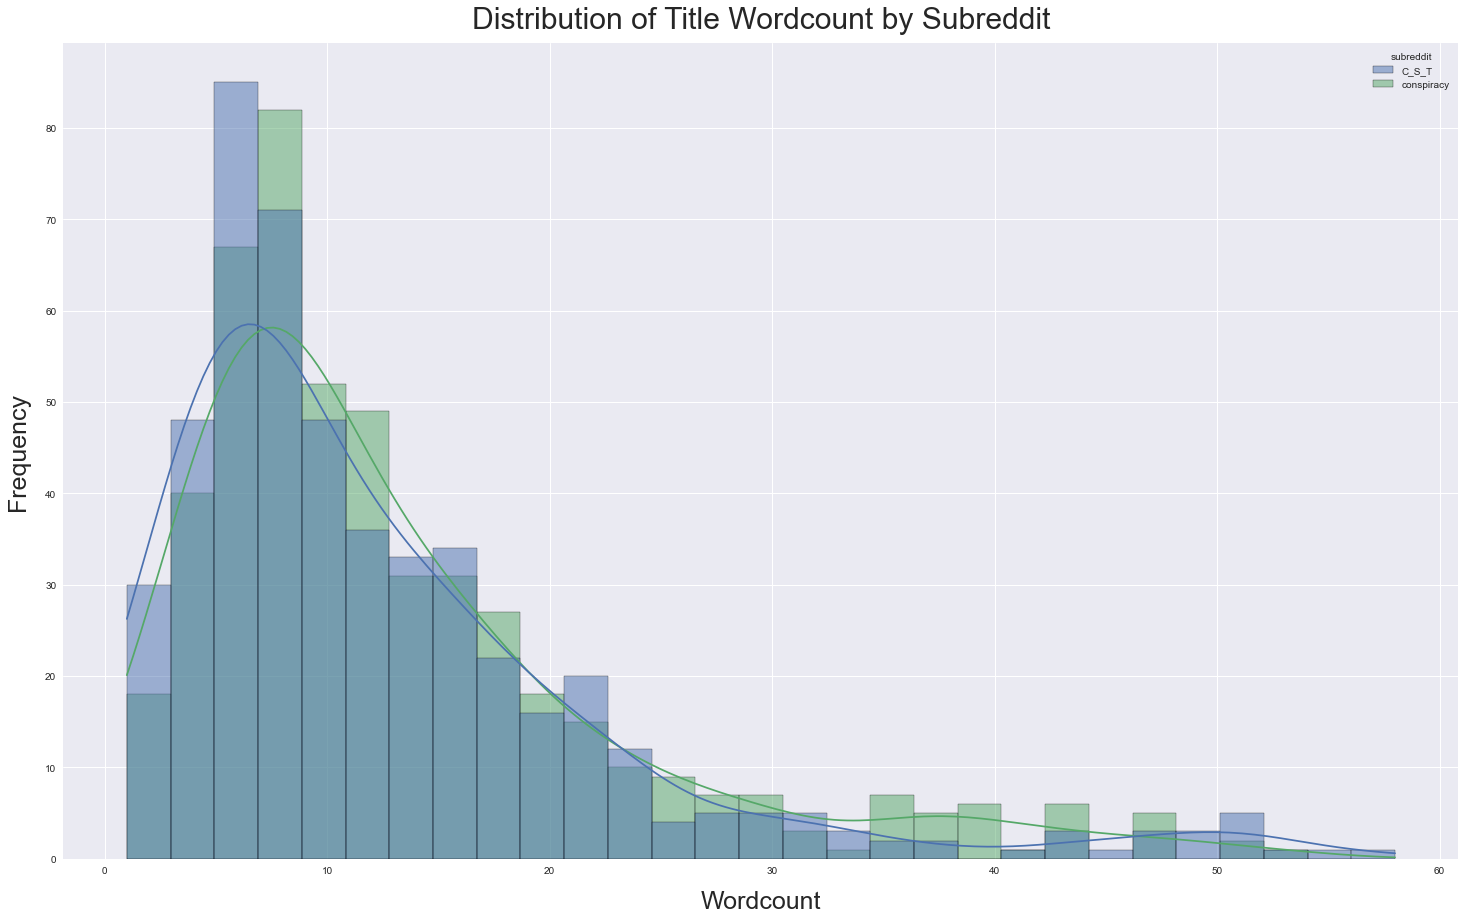

In [7]:
plt.style.use('seaborn')
sns.fig, ax = plt.subplots(1, 1, figsize=(25, 15))
ax.set_ylabel('Frequency', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax.set_xlabel('Wordcount', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax.set_title('Distribution of Title Wordcount by Subreddit', fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
sns.histplot(data=data, x='wordcount_title', hue='subreddit', kde=True, ax=ax);

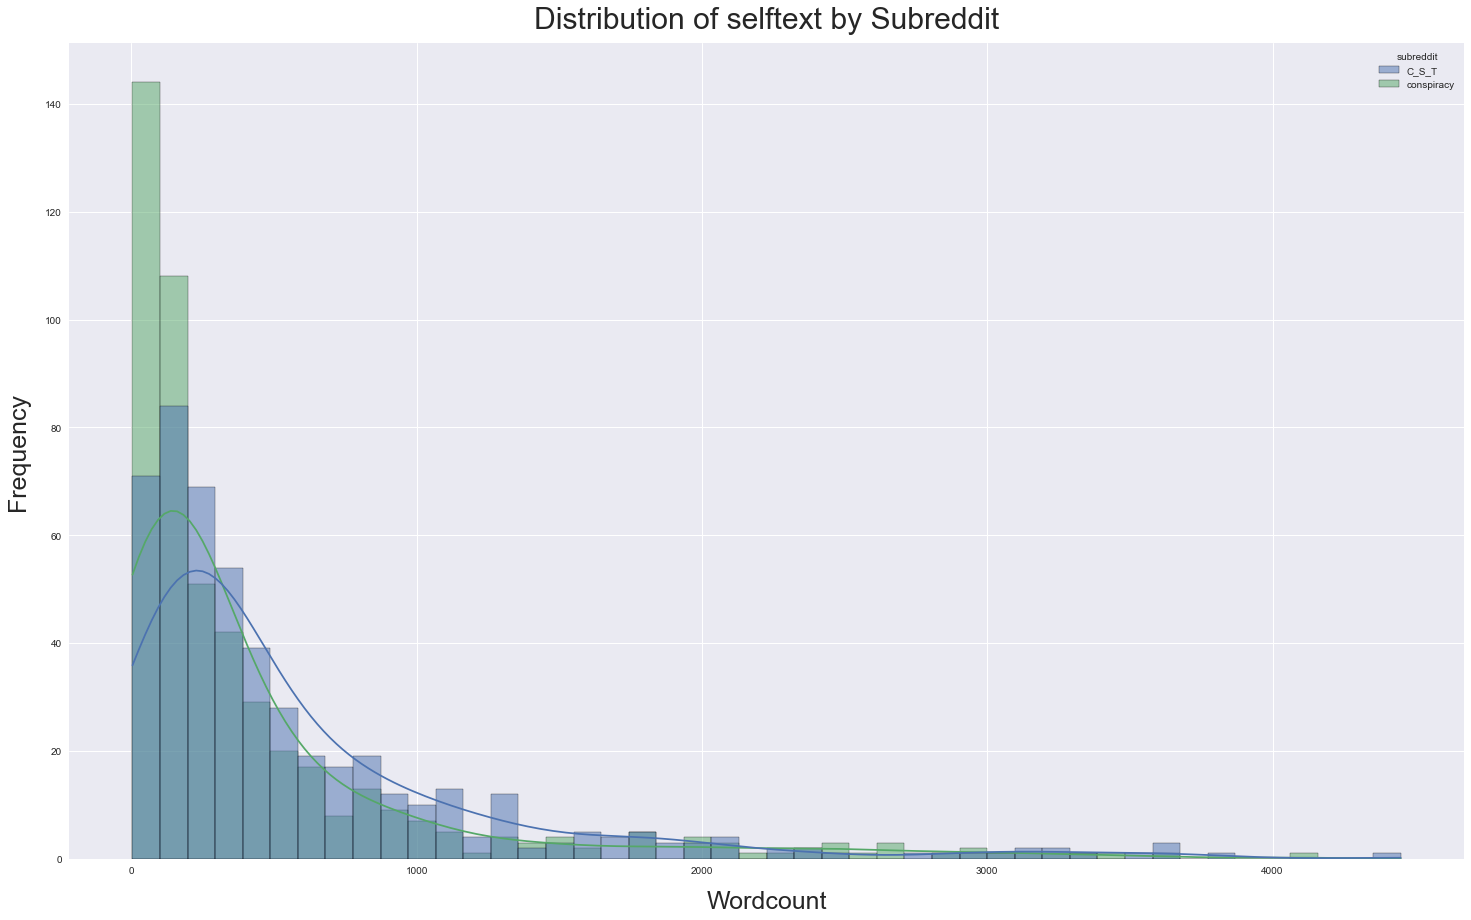

In [8]:
plt.style.use('seaborn')
sns.fig, ax = plt.subplots(1, 1, figsize=(25, 15))
ax.set_ylabel('Frequency', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax.set_xlabel('Wordcount', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax.set_title('Distribution of selftext by Subreddit', fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
sns.histplot(data=data, x='wordcount_clean_selftext', hue='subreddit', kde=True, ax=ax);

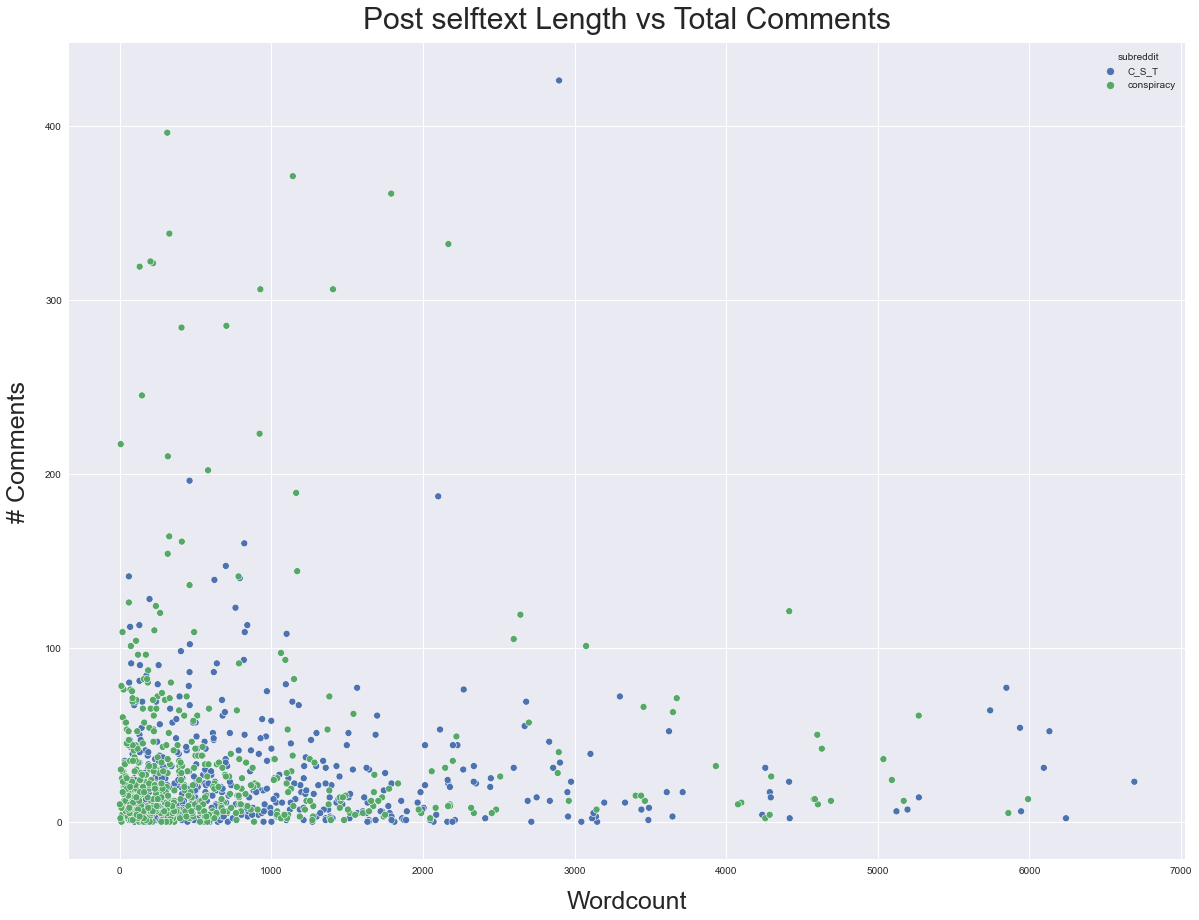

In [9]:
plt.style.use('seaborn')
sns.fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_ylabel('# Comments', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax.set_xlabel('Wordcount', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax.set_title('Post selftext Length vs Total Comments', fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
sns.scatterplot(data=data, x='wordcount_selftext', y='num_comments',hue='subreddit', ax=ax);

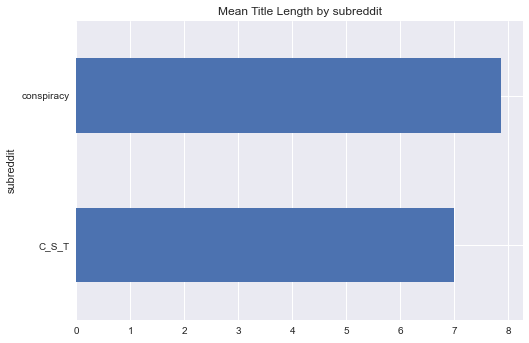

In [10]:
data.groupby(['subreddit'])['wordcount_clean_title'].mean().plot(kind='barh', title='Mean Title Length by subreddit');

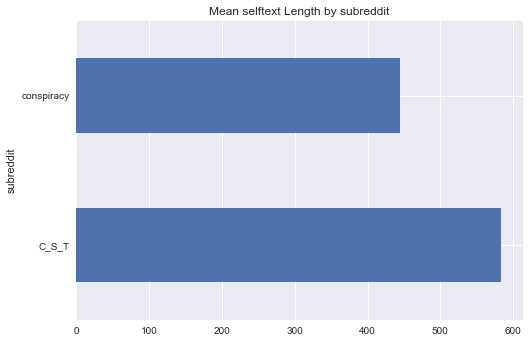

In [11]:
data.groupby(['subreddit'])['wordcount_clean_selftext'].mean().plot(kind='barh', title='Mean selftext Length by subreddit');

### Frequently Used Words

Examine the 10 most frequently used words in selftext and title for each individual subreddit

In [13]:
cv = CountVectorizer(stop_words='english')

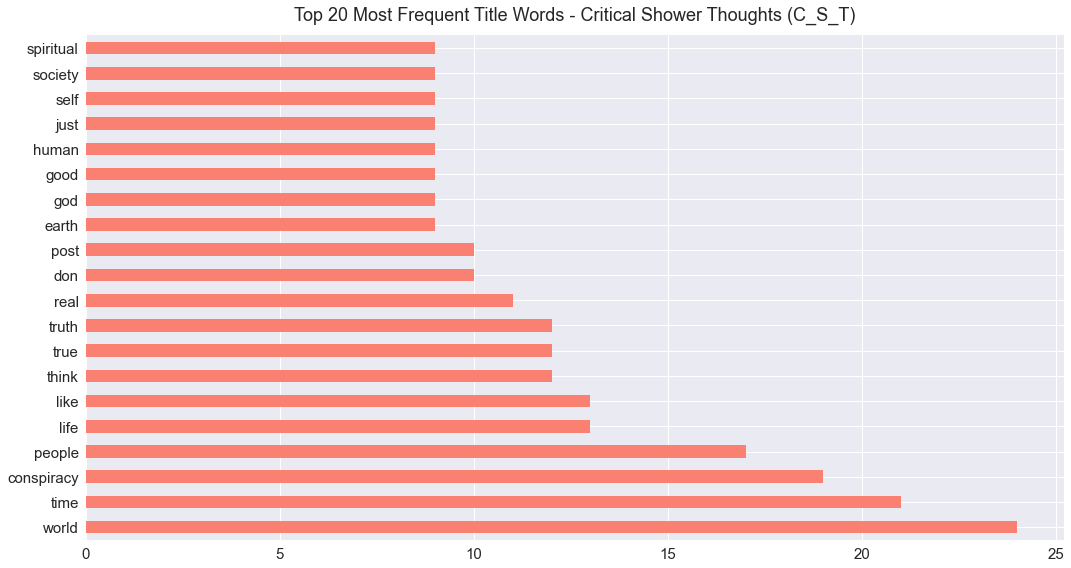

In [14]:
cst_df = data[data['subreddit'] == 'C_S_T']
cst_use = cst_df['title']
cst_vect = cv.fit_transform(cst_use)
cst_vect_df = pd.DataFrame(cst_vect.toarray(), columns=cv.get_feature_names_out())

#cst_vect_df
plt.subplots(figsize=(15,8))
cst_vect_df.sum().nlargest(20).plot(kind='barh', color='salmon', fontsize=15)
plt.title('Top 20 Most Frequent Title Words - Critical Shower Thoughts (C_S_T)', fontdict={'fontsize': 18, 'fontweight': 25}, pad=15)
plt.tight_layout();

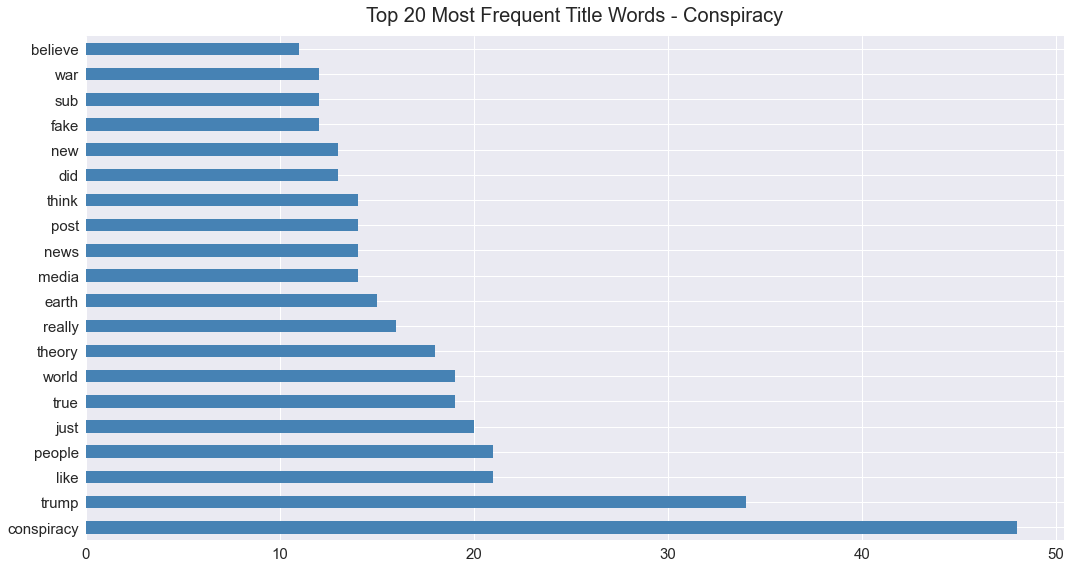

In [16]:
con_df = data[data['subreddit'] == 'conspiracy']
con_use = con_df['title']
con_vect = cv.fit_transform(con_use)
con_vect_df = pd.DataFrame(con_vect.toarray(), columns=cv.get_feature_names_out())

#cst_vect_df
plt.subplots(figsize=(15,8))
con_vect_df.sum().nlargest(20).plot(kind='barh', color='steelblue', fontsize=15)
plt.title('Top 20 Most Frequent Title Words - Conspiracy', fontdict={'fontsize': 20, 'fontweight': 25}, pad=15)
plt.tight_layout();

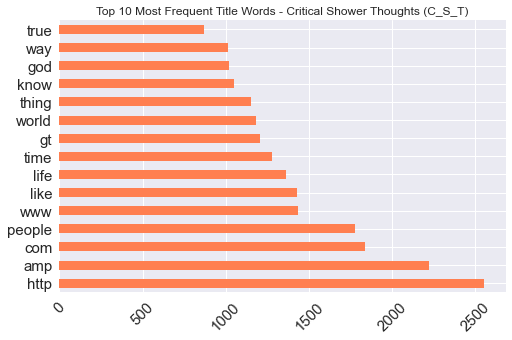

In [164]:
cst_df = data[data['subreddit'] == 'C_S_T']
cst_use = cst_df['clean_selftext']
cst_vect = cv.fit_transform(cst_use)
cst_vect_df = pd.DataFrame(cst_vect.toarray(), columns=cv.get_feature_names_out())

#cst_vect_df

plt.subplots(figsize=(8,5))
cst_vect_df.sum().nlargest(15).plot(kind='barh', color='coral', fontsize=15)
plt.title('Top 10 Most Frequent Title Words - Critical Shower Thoughts (C_S_T)');
plt.xticks(rotation=45);

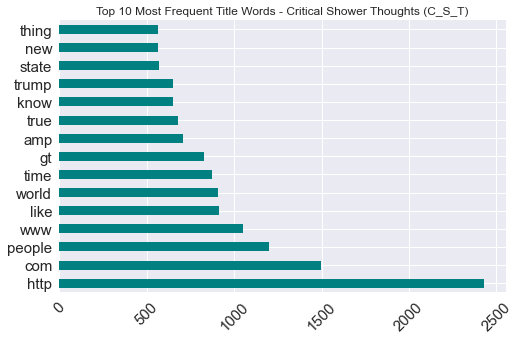

In [165]:
cst_df = data[data['subreddit'] == 'conspiracy']
cst_use = cst_df['clean_selftext']
cst_vect = cv.fit_transform(cst_use)
cst_vect_df = pd.DataFrame(cst_vect.toarray(), columns=cv.get_feature_names_out())

#cst_vect_df

plt.subplots(figsize=(8,5))
cst_vect_df.sum().nlargest(15).plot(kind='barh', color='teal', fontsize=15)
plt.title('Top 10 Most Frequent Title Words - Critical Shower Thoughts (C_S_T)');
plt.xticks(rotation=45);